2023-05-26 15:30:30.191857: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  2.535e-01|  1.435e-01|           37625|     6.870e-02|     3.572e-02|               9365|   2.036e-02|   1.060e-02|             2778|      9.775e+02|
|--------------------------------------------------------------------------------------------------------------------------------------------

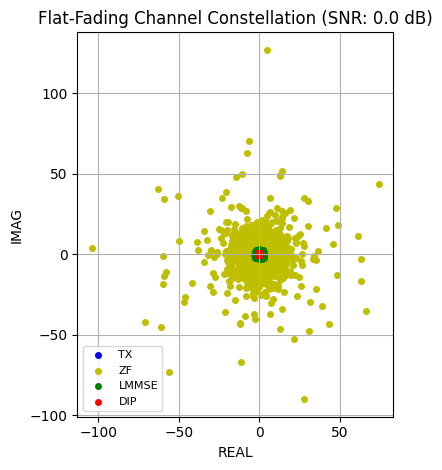

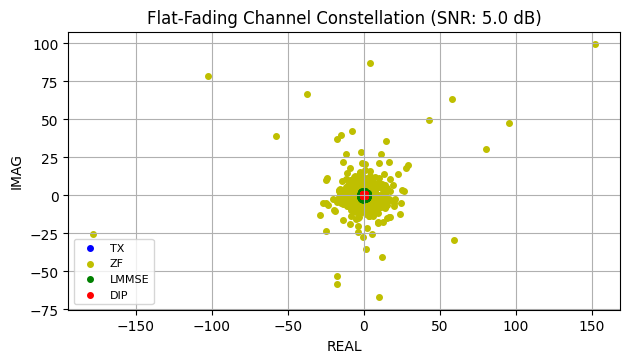

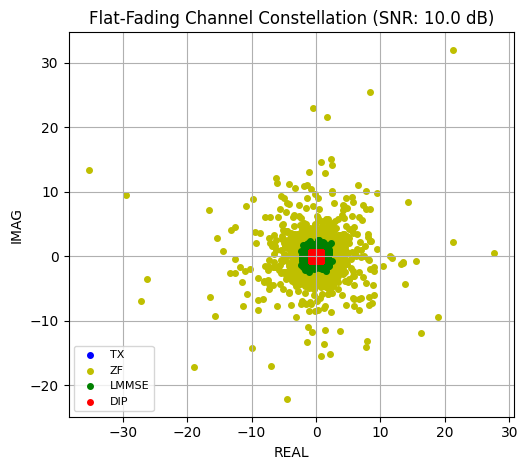

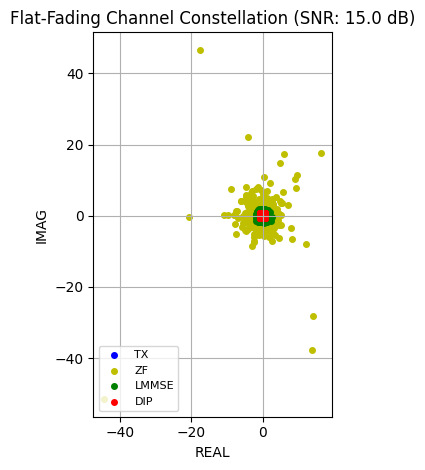

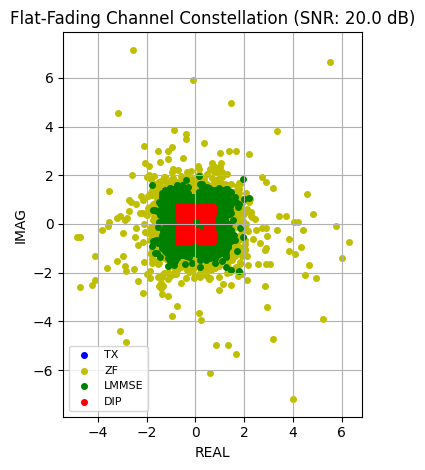

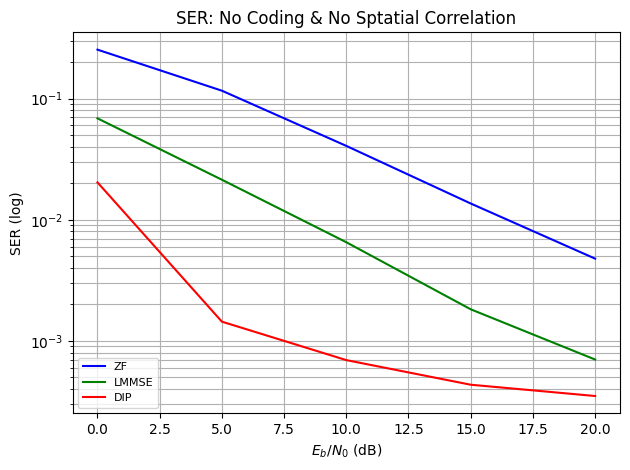

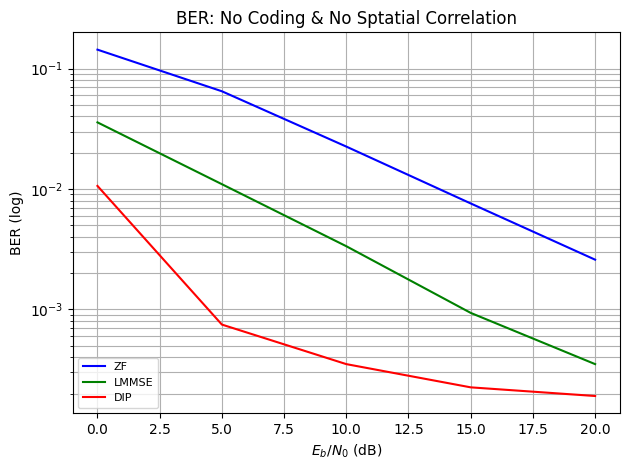

Loading BokehJS ...

Loading BokehJS ...

(array([ 0.,  5., 10., 15., 20.]),
 array([0.25347137, 0.11619568, 0.04070282, 0.01361847, 0.004776  ]),
 array([0.0687027 , 0.02139282, 0.00652313, 0.00182343, 0.0007019 ]),
 array([0.02035522, 0.00144196, 0.00069427, 0.00043488, 0.00035095]))

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from NCodeNCorr import ncodencorr

Block_Length = 1024         # Block Length (k)
NUM_BITS_PER_SYMBOL = 2    # Mapping: 4QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 8             # Transmit Antennas
NUM_RX_ANT = 8             # Receive Antennas

NUM_DATA_GROUP = 1         # Number of Data Group
BATCH_SIZE = 1024           # Number of Parallelly Processed Batches
EBN0_DB_MIN = 0.0          # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 25.0         # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 5        # EBNO Points

model_ncodencorr = ncodencorr(Block_Length, 
                              NUM_BITS_PER_SYMBOL,
                              CONSTELLATION_TYPE,
                              DEMAPPING_METHOD,
                              NUM_RX_ANT,
                              NUM_TX_ANT)

model_ncodencorr(NUM_DATA_GROUP,
                 BATCH_SIZE,
                 EBN0_DB_MIN,
                 EBN0_DB_MAX,
                 NUM_EBN0_POINTS)